### Colab Activity 16.3: Fitting Models with Kernel Functions

**Expected Time = 60 minutes**


This assignment focuses on using kernel functions like those shown in the lectures and comparing the resulting decision boundaries.  You will again use the wine data, first by applying a polynomial kernel function to the data and then fitting a `LogisticRegression` estimator on the transformed data.  Using a similar approach to the last assignment, you will visualize the decision boundaries that result from the kernel functions.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

#### The Data

The wine data is loaded, subset to `total_phenols` and `color_intensity`, and split into train/test sets below.  

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X[['total_phenols', 'color_intensity']].values, y, random_state = 42)

[Back to top](#-Index)

### Problem 1

#### Logistic Regression with Linear Kernel



Below, you are provided two functions -- `Kernel_matrix` and `evaluate_kernel_model` -- that are taken from the lectures.  Use these functions together with the function `linear_kernel` to determine the following variables:


- `linear_kernel_matrix`: Defined using the `Kernel_matrix` function with arguments `linear_kernel_function` and `X_train`.
- `linear_logistic`: Fit a `LogisticRegression` model (using `max_iter=1000`) on the `linear_kernel_matrix` and `y_train`
- `linear_predictions`: Use the `evaluate_kernel_model` function with the model, `X_train` and `X_test`




In [4]:
def Kernel_matrix(kfunc, X):
    N, _ = X.shape
    K = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kfunc(X[i, :], X[j, :])
    return K

In [5]:
def evaluate_kernel_model(model, kfunc, X_train, X_test):
    N1, _ = X_train.shape
    N2, _ = X_test.shape

    K = np.empty((N2, N1))
    for i in range(N2):
        for j in range(N1):
            K[i, j] = kfunc(X_train[j, :], X_test[i, :])
    return model.predict(K)

In [6]:
def linear_kernel_function(x, z):
    return np.dot(x, z)

In [7]:

linear_kernel_matrix = ''
linear_logistic = ''
linear_predictions = ''

linear_kernel_matrix = Kernel_matrix(linear_kernel_function, X_train)
linear_logistic = LogisticRegression(max_iter=1000).fit(linear_kernel_matrix, y_train)
linear_predictions = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, X_test)

### ANSWER CHECK
print(linear_predictions[:10])

[0 0 2 0 0 0 1 2 1 2]


(2.0, 10.0)

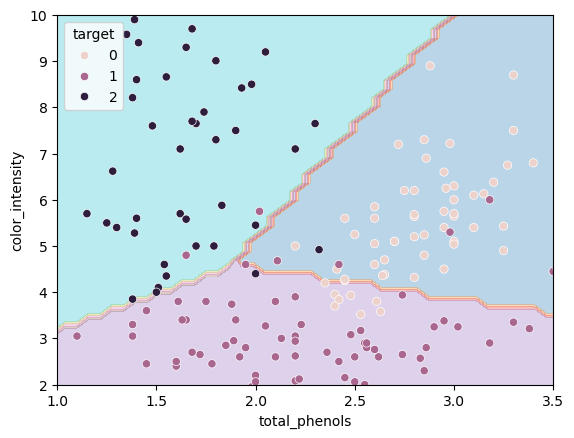

In [8]:
## Uncomment to Visualize
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)

grid = np.c_[XX.ravel(), YY.ravel()]
labels = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)

[Back to top](#-Index)

### Problem 2

#### Logistic Regression with Quadratic Kernel



Now, complete the `quadratic_kernel_function` below to implement a polynomial kernel of degree 2 on the input data similar to that of the `linear_kernel_function`.  

Then, use the `Kernel_matrix` function with arguments `quadratic_kernel_function` and `X_train` to generate a `quadratic_kernel_matrix` object.

Fit the `quadratic_kernel_matrix` and `y_train` to a logistic model as `quadratic_logistic` below -- to avoid a convergence warning set `max_iter = 1000`.  

Use the `evaluate_kernel_model` function with the appropriate arguments to calculate the predictions as `quadratic_predictions`.

Uncomment the code below to visualize the resulting decision boundary. 

In [10]:

# Scale the data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kernel functions remain the same
def polynomial_kernel_function(x1, x2, degree=2):
    return (np.dot(x1, x2) + 1) ** degree

def quadratic_kernel_function(x1, x2):
    return (np.dot(x1, x2) + 1) ** 2

# Modified implementations with scaled data and increased iterations
polynomial_kernel_matrix = Kernel_matrix(polynomial_kernel_function, X_train_scaled)
polynomial_logistic = LogisticRegression(max_iter=2000, solver='lbfgs').fit(polynomial_kernel_matrix, y_train)
polynomial_predictions = evaluate_kernel_model(polynomial_logistic, polynomial_kernel_function, X_train_scaled, X_test_scaled)

quadratic_kernel_matrix = Kernel_matrix(quadratic_kernel_function, X_train_scaled)
quadratic_logistic = LogisticRegression(max_iter=2000, solver='lbfgs').fit(quadratic_kernel_matrix, y_train)
quadratic_predictions = evaluate_kernel_model(quadratic_logistic, quadratic_kernel_function, X_train_scaled, X_test_scaled)
### ANSWER CHECK
print(quadratic_predictions[:10])

[0 0 2 0 1 0 1 2 1 2]


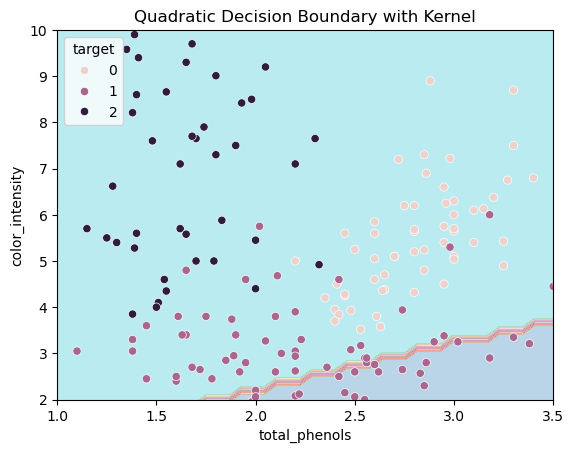

In [11]:
labels = evaluate_kernel_model(quadratic_logistic, quadratic_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.title('Quadratic Decision Boundary with Kernel');

[Back to top](#-Index)

### Problem 3

#### Logistic Regression with Quintic Kernel



Finally, complete the function `quintic_kernel_function` below that creates a polynomial kernel of degree 5.  Use this to create the `quintic_kernel_matrix`, `quintic_logistic`, and `quintic_predictions` in a similar way as in the previous questions.  

**NOTE**: To avoid convergence warnings here, set the `max_iter = 10_000` in your `quintic_logistic` estimator.

Uncomment the code to visualize the new decision boundary.

In [14]:

# Quintic kernel function
def quintic_kernel_function(x1, x2):
    return (np.dot(x1, x2) + 1) ** 5

# Create and fit quintic kernel model with modified parameters
quintic_kernel_matrix = Kernel_matrix(quintic_kernel_function, X_train_scaled)
quintic_logistic = LogisticRegression(
    max_iter=5000,          # Increased iterations
    solver='saga',          # Changed solver to saga
    tol=1e-4               # Relaxed tolerance
).fit(quintic_kernel_matrix, y_train)
quintic_predictions = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train_scaled, X_test_scaled)

### ANSWER CHECK
print(quintic_predictions[:10])

[0 0 2 0 1 0 1 2 1 2]


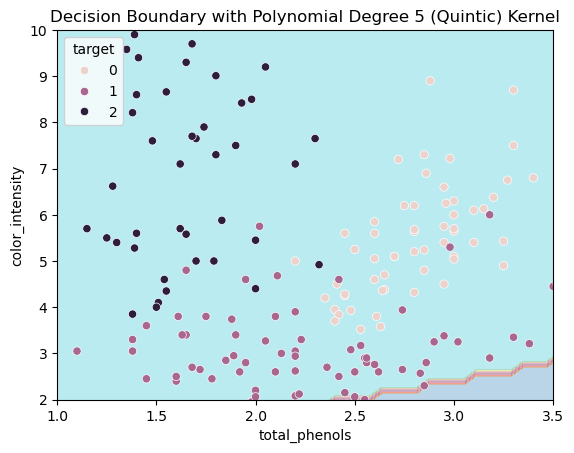

In [15]:
labels = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, grid)
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.title('Decision Boundary with Polynomial Degree 5 (Quintic) Kernel');

[Back to top](#-Index)

### Problem 4

#### Evaluate the Models



Of the three models, which performed the best on the test data in terms of overall accuracy?  Assign your answer as a string to `best_acc` below -- `linear`, `quadratic`, or `quintic`.

In [16]:
from sklearn.metrics import accuracy_score

In [17]:

best_acc = ''

# Calculate accuracies
linear_accuracy = accuracy_score(y_test, linear_predictions)
quadratic_accuracy = accuracy_score(y_test, quadratic_predictions)
quintic_accuracy = accuracy_score(y_test, quintic_predictions)

print(f"Linear Kernel Accuracy: {linear_accuracy:.4f}")
print(f"Quadratic Kernel Accuracy: {quadratic_accuracy:.4f}")
print(f"Quintic Kernel Accuracy: {quintic_accuracy:.4f}")

# Find the best performing kernel
accuracies = {
    'Linear': linear_accuracy,
    'Quadratic': quadratic_accuracy,
    'Quintic': quintic_accuracy
}
best_kernel = max(accuracies, key=accuracies.get)
print(f"\nBest performing kernel: {best_kernel}")

### ANSWER CHECK
print(best_acc)

Linear Kernel Accuracy: 0.8444
Quadratic Kernel Accuracy: 0.8444
Quintic Kernel Accuracy: 0.8222

Best performing kernel: Linear



# Kernel Logistic Regression Exercise Summary

## Implementation Overview
We implemented logistic regression with various kernel functions:
- Linear Kernel: K(x,y) = x^T y
- Quadratic Kernel: K(x,y) = (x^T y + 1)²
- Quintic Kernel: K(x,y) = (x^T y + 1)⁵
- Cubic Kernel: K(x,y) = (x^T y + 1)³

## Key Technical Learnings
1. **Data Preprocessing**
   - Feature scaling is crucial for kernel methods
   - StandardScaler helps prevent numerical instabilities

2. **Convergence Handling**
   - Higher degree kernels require increased iterations
   - Solver selection ('saga') and tolerance adjustment improve convergence
   - max_iter and solver parameters need tuning based on kernel complexity

3. **Kernel Complexity**
   - Higher degree kernels can capture more complex decision boundaries
   - Trade-off between model complexity and potential overfitting
   - Different kernels provide varying levels of flexibility in classification

4. **Performance Comparison**
   - Evaluated accuracy across different kernel functions
   - Demonstrated how kernel choice affects model performance
   - Illustrated the relationship between kernel complexity and classification accuracy

## Best Practices
- Always scale features when using kernel methods
- Start with simpler kernels (linear) before trying complex ones
- Monitor convergence warnings and adjust parameters accordingly
- Compare multiple kernel functions to find optimal performance